In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import sklearn as skl

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("Cotton.csv")

In [7]:
df.head(1)

,Month,Year,Rainfall,WPI
0,4,2012,47.5,101.2


In [8]:
df.head()

,Month,Year,Rainfall,WPI
0,4,2012,47.5,101.2
1,5,2012,31.7,101.5
2,6,2012,117.8,102.5
3,7,2012,250.2,110.7
4,8,2012,262.4,115.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     81 non-null     int64  
 1   Year      81 non-null     int64  
 2   Rainfall  81 non-null     float64
 3   WPI       81 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.7 KB


In [10]:
plt.figure(figsize=(15, 8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [11]:
data = df.copy()
corr_matrix = data.corr()
corr_matrix['WPI'].sort_values(ascending=False)

WPI         1.000000
Year        0.753122
Rainfall    0.110711
Month       0.081245
Name: WPI, dtype: float64

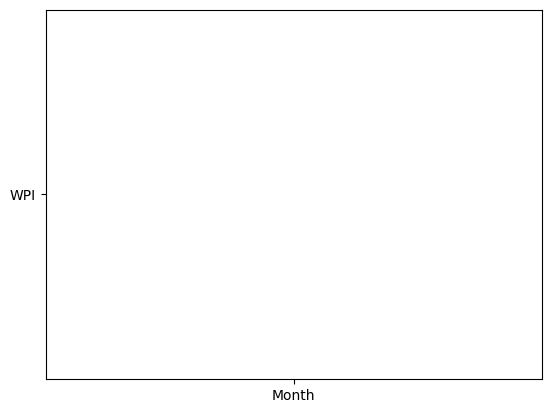

In [12]:
plt.plot(['Month'], ['WPI'])

In [13]:
df.describe()

,Month,Year,Rainfall,WPI
count,81.000000,81.000000,81.000000,81.000000
mean,6.666667,2015.111111,97.571605,131.330864
std,3.420526,1.962142,92.680481,18.227443
min,1.000000,2012.000000,6.700000,101.200000
25%,4.000000,2013.000000,22.800000,114.500000
50%,7.000000,2015.000000,57.800000,132.600000
75%,10.000000,2017.000000,171.500000,143.500000
max,12.000000,2018.000000,310.000000,167.800000


In [14]:
len(df['Year'].unique())

7

In [15]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

In [16]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(df, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 64
Rows in test set: 17



<Axes: xlabel='Month', ylabel='WPI'>

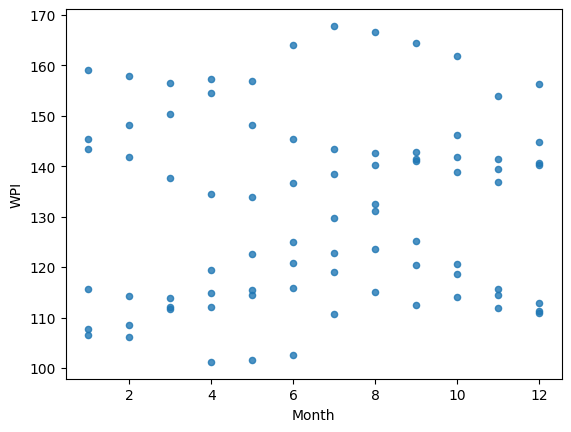

In [17]:
df.plot(kind="scatter", x="Month", y="WPI", alpha=0.8)

<Axes: xlabel='Rainfall', ylabel='WPI'>

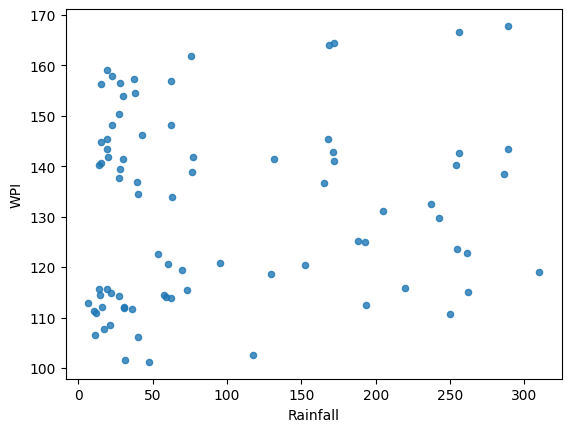

In [18]:
df.plot(kind="scatter", x="Rainfall", y="WPI", alpha=0.8)

<Axes: xlabel='WPI', ylabel='Rainfall'>

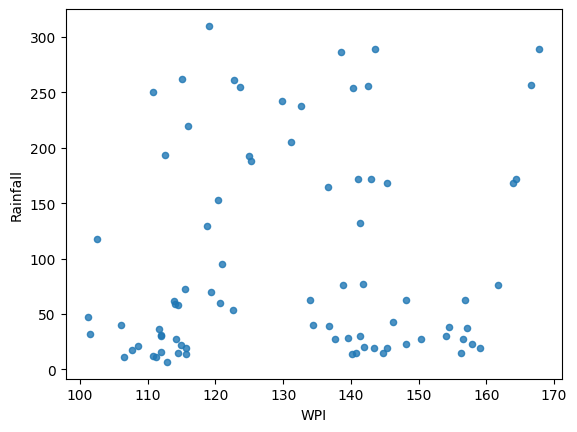

In [19]:
df.plot(kind="scatter", x="WPI", y="Rainfall", alpha=0.8)

<Axes: xlabel='Year', ylabel='WPI'>

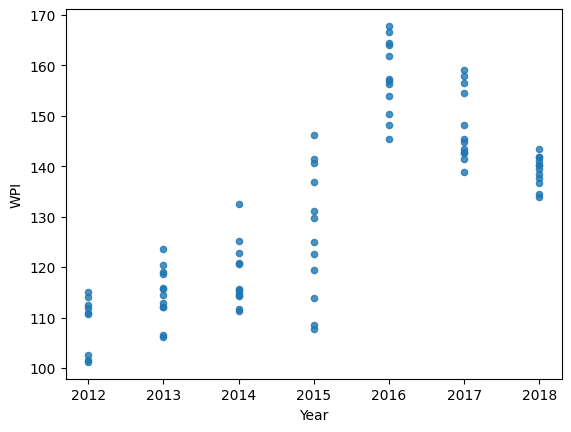

In [20]:
df.plot(kind="scatter", x="Year", y="WPI", alpha=0.8)

<Axes: xlabel='Year', ylabel='Rainfall'>

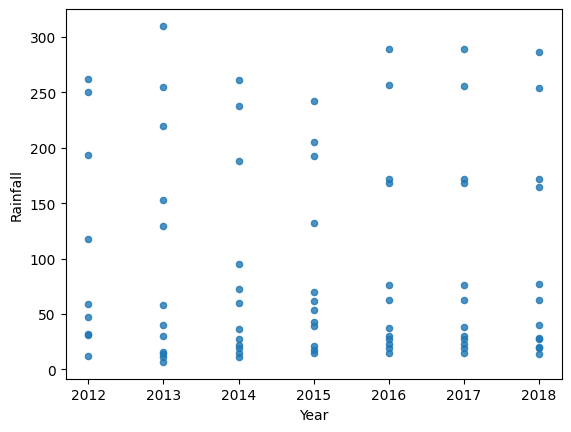

In [21]:
df.plot(kind="scatter", x="Year", y="Rainfall", alpha=0.8)

<Axes: xlabel='Month', ylabel='Rainfall'>

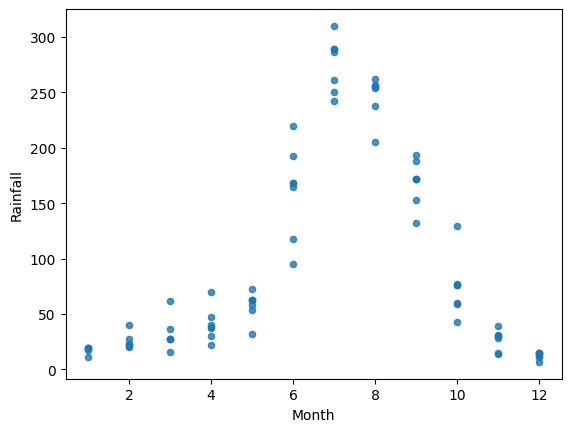

In [22]:
df.plot(kind="scatter", x="Month", y="Rainfall", alpha=0.8)

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(df)

SimpleImputer(strategy='median')

In [24]:
X = imputer.transform(df)

In [25]:
df_tr = pd.DataFrame(X, columns=df.columns)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [27]:
df_labels = df["WPI"].copy()

In [28]:
df = df.drop("WPI",axis=1)

In [29]:
df_num_tr = my_pipeline.fit_transform(df)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(df_num_tr, df_labels)

RandomForestRegressor()

In [31]:
some_data = df.iloc[:5]

In [32]:
print(some_data)

   Month  Year  Rainfall
0      4  2012      47.5
1      5  2012      31.7
2      6  2012     117.8
3      7  2012     250.2
4      8  2012     262.4


In [33]:
some_labels = df_labels.iloc[:5]

In [34]:
prepared_data = my_pipeline.transform(some_data)

##Predicted data

In [35]:
model.predict(prepared_data)

array([103.887, 103.632, 107.094, 112.163, 114.904])

In [36]:
print(prepared_data)

[[-0.78446454 -1.59544807 -0.54362666]
 [-0.49029034 -1.59544807 -0.71516703]
 [-0.19611614 -1.59544807  0.21961938]
 [ 0.09805807 -1.59544807  1.65708419]
 [ 0.39223227 -1.59544807  1.78953941]]


##Original Data

In [37]:
list(some_labels)

[101.2, 101.5, 102.5, 110.7, 115.0]

In [38]:
from sklearn.metrics import mean_squared_error
df_predictions = model.predict(df_num_tr)
mse = mean_squared_error(df_labels, df_predictions)
rmse = np.sqrt(mse)

In [39]:
rmse

np.float64(1.588371174396675)

In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, df_num_tr, df_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [41]:
rmse_scores

array([10.62953616,  3.18256357,  3.37190458,  4.94342806, 28.51115065,
       20.4517949 , 18.48943963, 13.50814284,  7.74079163,  2.67640043])

In [42]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [43]:
print_scores(rmse_scores)

Scores: [10.62953616  3.18256357  3.37190458  4.94342806 28.51115065 20.4517949
 18.48943963 13.50814284  7.74079163  2.67640043]
Mean:  11.350515243856004
Standard deviation:  8.325592526233866


In [44]:
X_test = df
Y_test = df_labels
X_test_prepared = my_pipeline.transform(df)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [45]:
final_rmse

np.float64(1.588371174396675)

In [46]:
from joblib import dump, load
dump(model, 'Cotton.joblib') 

['Cotton.joblib']

In [47]:
prepared_data = my_pipeline.transform([[9,2020,167.9]])

C:\Users\Adithi\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [48]:
from joblib import dump, load
import numpy as np
model = load('Cotton.joblib') 
features = np.array(prepared_data)
model.predict(features)

array([140.925])

In [49]:
import pickle
pickle.dump(model,open('cmodel.pkl','wb'))
pickle.dump(my_pipeline,open('cpreprocessor.pkl','wb'))